In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df_test = pd.read_csv("data/test.csv")
df_train = pd.read_csv("data/train.csv")

In [3]:
pd.set_option('display.max_columns', None)
df_train.head()
# df_train.shape

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df_test.head()
df_test.shape

(878, 80)

In [5]:
df_train.columns[df_train.isnull().any()]

Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature'],
      dtype='object')

Text(0.5, 0, 'Lot Frontage (ft)')

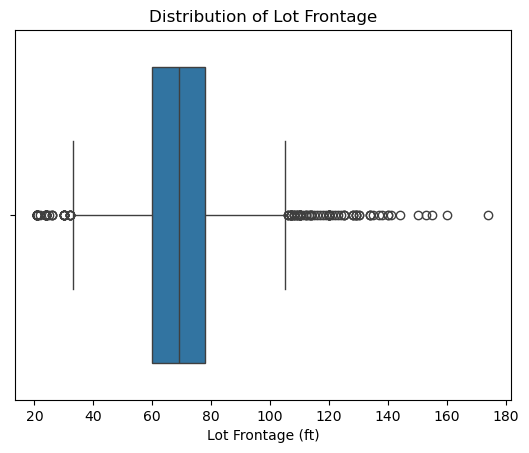

In [6]:
# df_train["Lot Frontage"].isna().sum() -- 330 rows -- remove 4 outliers and replace NaN with the average.

df_train["Lot Frontage"].mean()

df_train["Lot Frontage"].fillna(69.1, inplace = True)

df_train.drop(df_train[df_train["Lot Frontage"] > 190].index, inplace = True)

sns.boxplot(data = df_train,
            x = "Lot Frontage")
plt.title("Distribution of Lot Frontage")
plt.xlabel("Lot Frontage (ft)")

The above boxplot displays the distribution of lot frontage after 4 outliers greater than 190 feet were removed.

Text(0.5, 0, 'Mas Vnr Area (sq ft)')

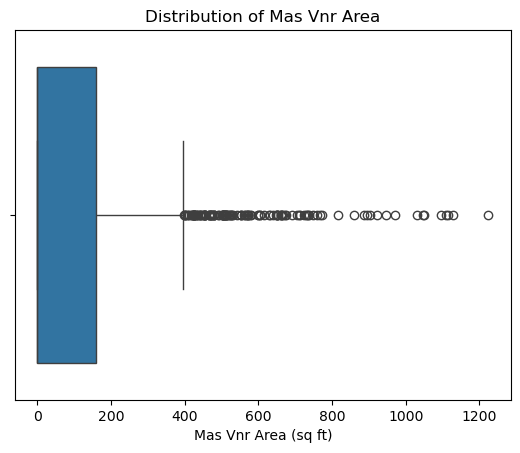

In [8]:
# df_train["Mas Vnr Area"].isna().sum() -- 22 -- remove 1 outlier and replace with the average.

df_train["Mas Vnr Area"].mean()

df_train["Mas Vnr Area"].fillna(99.7, inplace = True)

df_train.drop(df_train[df_train["Mas Vnr Area"] > 1400].index, inplace = True)

sns.boxplot(data = df_train,
            x = "Mas Vnr Area")
plt.title("Distribution of Mas Vnr Area")
plt.xlabel("Mas Vnr Area (sq ft)")

The above boxplot displays the distribution of masonry veneer are after 1 outlier greater than 1400 square feet was removed.

Text(0.5, 0, 'BsmtFin SF 1 (sq ft)')

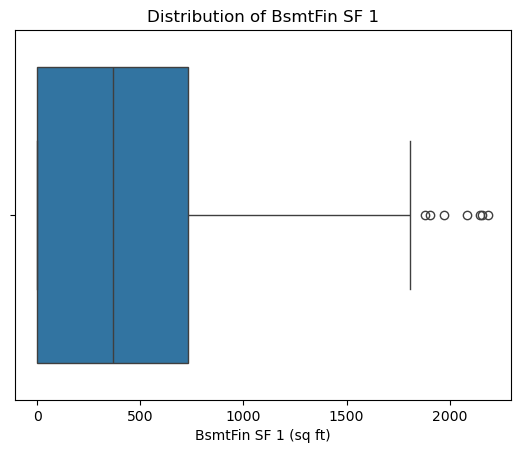

In [10]:
# df_train["BsmtFin SF 1"].isna().sum() -- 1 -- remove 1 outlier and replace NaN with 0 b/c no basement.

df_train["BsmtFin SF 1"].fillna(0, inplace = True)

df_train.drop(df_train[df_train["BsmtFin SF 1"] > 3500].index, inplace = True)

sns.boxplot(data = df_train,
            x = "BsmtFin SF 1")
plt.title("Distribution of BsmtFin SF 1")
plt.xlabel("BsmtFin SF 1 (sq ft)")

The above boxplot displays the distribution of basement finished type 1 area after 1 outlier greater than 3500 square feet was removed.

Text(0.5, 0, 'BsmtFin SF 2 (sq ft)')

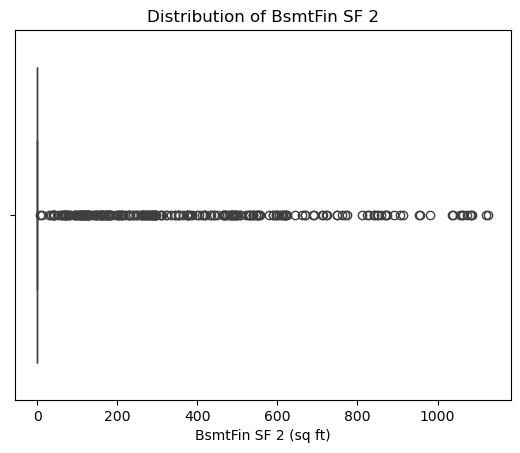

In [12]:
# df_train["BsmtFin SF 2"].isna().sum() -- 1 -- remove 2 outliers and replace NaN with 0 b/c no basement.

df_train["BsmtFin SF 2"].fillna(0, inplace = True)

df_train.drop(df_train[df_train["BsmtFin SF 2"] > 1200].index, inplace = True)

sns.boxplot(data = df_train,
            x = "BsmtFin SF 2")
plt.title("Distribution of BsmtFin SF 2")
plt.xlabel("BsmtFin SF 2 (sq ft)")

The above boxplot displays the distribution of basement finished type 2 area after 2 outliers greater than 1200 square feet were removed.

Text(0.5, 0, 'Bsmt Unf SF (sq ft)')

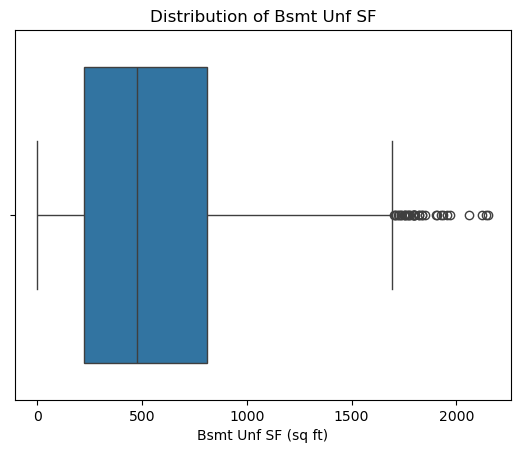

In [14]:
# df_train["Bsmt Unf SF"].isna().sum() -- 1 -- remove 1 outlier and replace NaN with 0 b/c no basement.

df_train["Bsmt Unf SF"].fillna(0, inplace = True)

df_train.drop(df_train[df_train["Bsmt Unf SF"] > 2300].index, inplace = True)

sns.boxplot(data = df_train,
            x = "Bsmt Unf SF")
plt.title("Distribution of Bsmt Unf SF")
plt.xlabel("Bsmt Unf SF (sq ft)")

The above boxplot displays the distribution of unfinished square feet of basement area after 1 outlier greater than 2300 square feet was removed.

Text(0.5, 0, 'Total Bsmt SF (sq ft)')

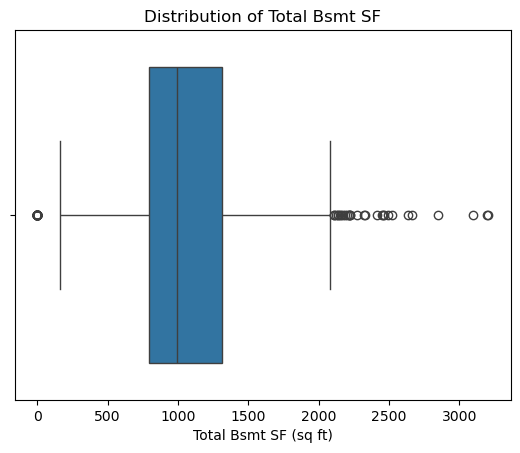

In [16]:
# df_train["Total Bsmt SF"].isna().sum() -- 1 -- replace NaN with 0 b/c no basement.

df_train["Total Bsmt SF"].fillna(0, inplace = True)

sns.boxplot(data = df_train,
            x = "Total Bsmt SF")
plt.title("Distribution of Total Bsmt SF")
plt.xlabel("Total Bsmt SF (sq ft)")

In [17]:
# df_train["Bsmt Full Bath"].isna().sum() -- 2  -- no basement, therefore no bsmt bathrooms so replace NaN with 0.

df_train["Bsmt Full Bath"].fillna(0, inplace = True)

# df_train["Bsmt Half Bath"].isna().sum() -- 2 -- no basement, therefore no bsmt bathrooms so replace NaN with 0.

df_train["Bsmt Half Bath"].fillna(0, inplace = True)

In [18]:
# df_train["Garage Cars"].isna().sum() -- 1 -- change NaN to 0 b/c there's no garage, therefore no garage cars.

df_train["Garage Cars"].fillna(0, inplace = True)

# df_train["Garage Area"].isna().sum() -- 1 -- change NaN to 0 b/c there's no garage, therefore no garage cars.

df_train["Garage Area"].fillna(0, inplace = True)

In [19]:
pd.set_option('display.max_rows', None)
df_train.isna().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Alley              1903
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type       1237
Mas Vnr Area          0
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            54
Bsmt Cond            54
Bsmt Exposure        57
BsmtFin Type 1       54
BsmtFin SF 1          0
BsmtFin Type 2       55
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC      

In [20]:
df_test.columns[df_test.isnull().any()]

Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'Electrical', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')

In [21]:
# df_test["Lot Frontage"].isna().sum() -- 160 -- replace with the df_train average.

df_train["Lot Frontage"].fillna(69.1, inplace = True)

In [22]:
# df_test["Mas Vnr Area"].isna().sum() -- 1 -- replace NaN with 0 b/c Mas Vnr Type is NaN.

df_test["Mas Vnr Area"].fillna(0, inplace = True)

In [23]:
# df_test["Electrical"].isna().sum() -- 1 -- replace with the mode.

df_test["Electrical"].mode()

df_test["Electrical"] = df_test["Electrical"].fillna("SBrkr")

In [24]:
pd.set_option('display.max_rows', None)
df_test.isna().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley              820
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type       535
Mas Vnr Area         0
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
BsmtFin SF 1         0
BsmtFin Type 2      25
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical 

In [25]:
df_train.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [26]:
df_test.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1         int64
BsmtFin Type 2      object
B

<Axes: >

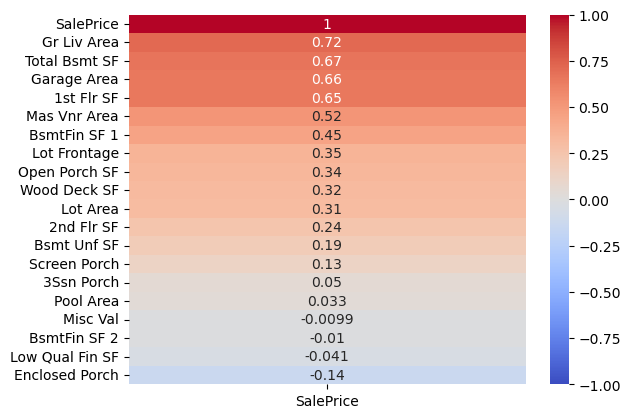

In [27]:
df_train_int = df_train[["Lot Frontage",
                         "Lot Area",
                         "Mas Vnr Area",
                         "BsmtFin SF 1",
                         "BsmtFin SF 2",
                         "Bsmt Unf SF",
                         "Total Bsmt SF",
                         "1st Flr SF",
                         "2nd Flr SF",
                         "Low Qual Fin SF",
                         "Gr Liv Area",
                         "Garage Area",
                         "Wood Deck SF",
                         "Open Porch SF",
                         "Enclosed Porch",
                         "3Ssn Porch",
                         "Screen Porch",
                         "Pool Area",
                         "Misc Val",
                         "SalePrice"]].copy()

sns.heatmap(df_train_int.corr()[["SalePrice"]].sort_values(by = "SalePrice", ascending = False),
           vmin = -1,
           vmax = 1,
           cmap = "coolwarm",
           annot = True)

The above heatmap displays the various correlations that certain continuous variable in the dataset have with sale price. The top-most tier of the heatmap displays that generally as area increases (whether it be above ground living area, basement area, garage area, or first floor area), sale price also increases.

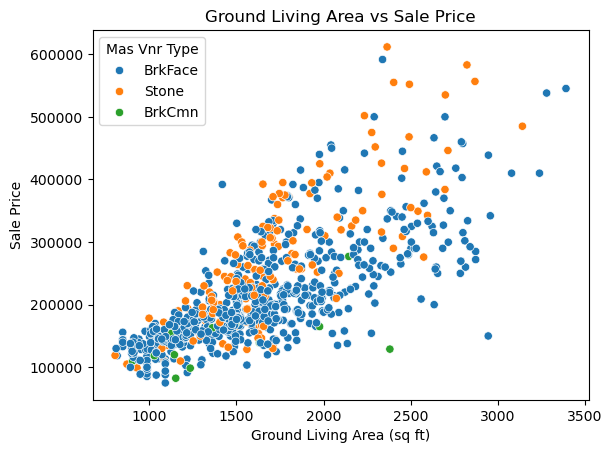

In [29]:
# Gr Liv Area vs SalePrice
# The more above ground living area, the more expensive the house will be.

sns.scatterplot(data = df_train,
               x = "Gr Liv Area",
               y = "SalePrice",
               hue = "Mas Vnr Type")

plt.title("Ground Living Area vs Sale Price")
plt.xlabel("Ground Living Area (sq ft)")
plt.ylabel("Sale Price")

plt.savefig("images/plot1.png")

The above scatterplot displays that as above ground living area increases, sale price also increases. Brick face masonry veneer type seems to be the most commonly used veneer type followed by stone which seems to be slightly associated with a higher sale price and then brick common being the least common veneer type.

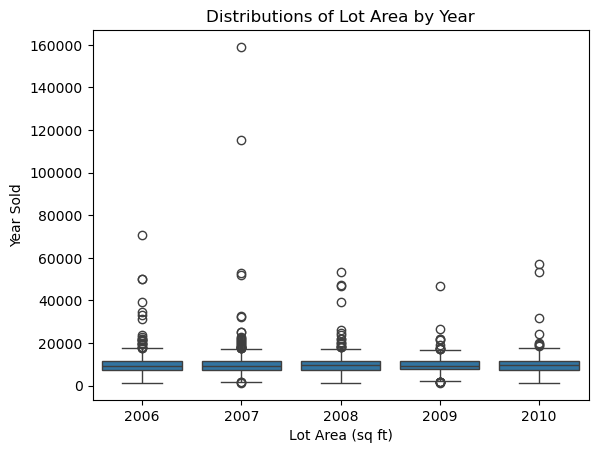

In [31]:
# Lot Area by Yr Sold
# The cost of land has increased over the years so maybe the data shows a smaller amount of lot area sold as time went on due to land scarcity and price.

df_train.groupby("Yr Sold")["Lot Area"].mean()

sns.boxplot(data = df_train,
           x = "Yr Sold",
           y = "Lot Area")
plt.title("Distributions of Lot Area by Year")
plt.xlabel("Lot Area (sq ft)")
plt.ylabel("Year Sold")

plt.savefig("images/plot2.png")

The above side-by-side boxplots display the distributions of lot area by year. Overall, the average lot area has decreased over time potentially due to land scarcity or price.

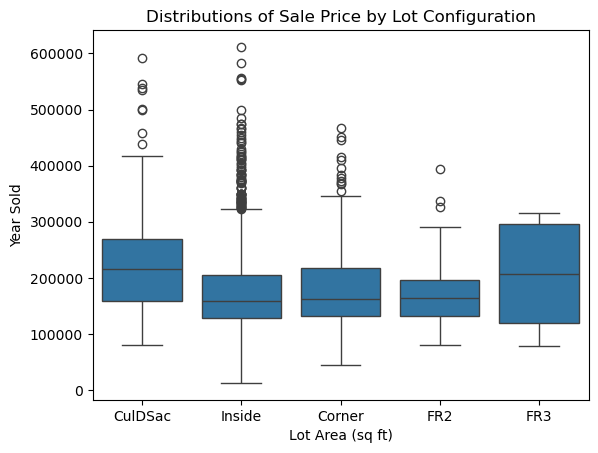

In [33]:
# Lot Config vs SalePrice
# Are certain lot configurations more or less expensive?

df_train.groupby("Lot Config")["SalePrice"].mean()

sns.boxplot(data = df_train,
           x = "Lot Config",
           y = "SalePrice")
plt.title("Distributions of Sale Price by Lot Configuration")
plt.xlabel("Lot Area (sq ft)")
plt.ylabel("Year Sold")

plt.savefig("images/plot3.png")

The above side-by-side boxplots display the distributions of sale price by lot configuration. Overall, the average sale price for a home in a cul-de-sac is the most expensive followed by a lot with frontage on 3 sides of the property. An inside lot, a corner lot, and a lot with frontage on 2 sides of the property seem to have close averages and lower sale prices.

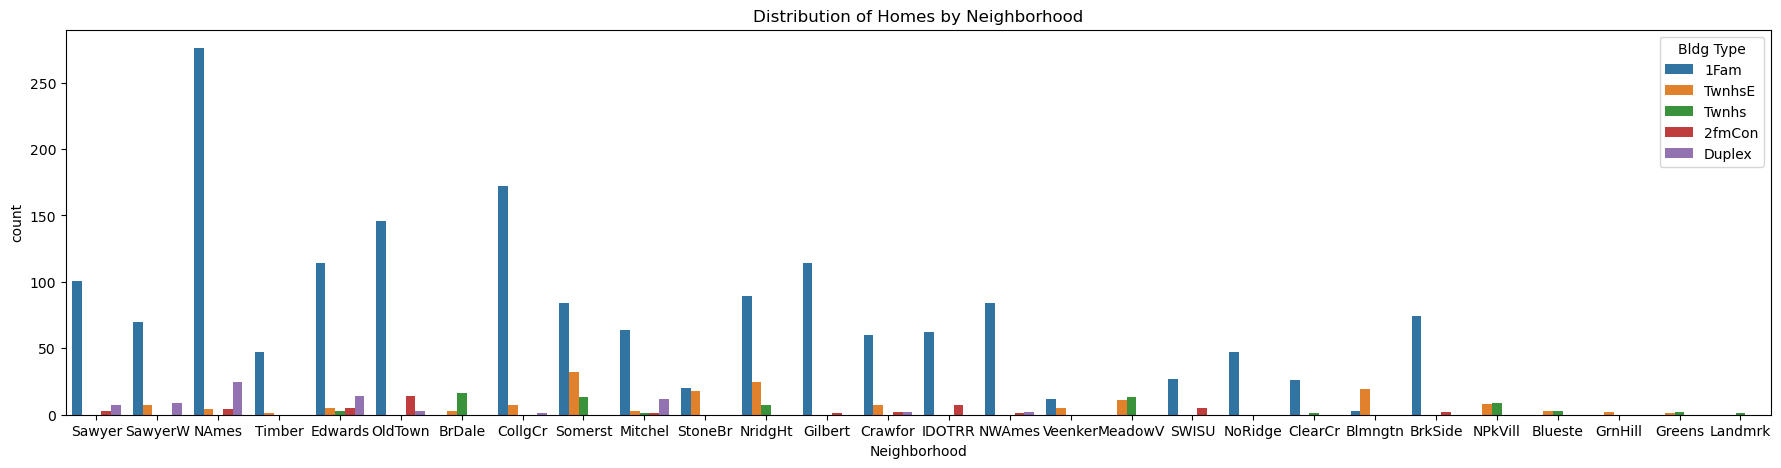

In [35]:
# Bar Graph of Neighborhoods
# Which neighborhoods have the most houses?

plt.figure(figsize = (22, 5))

sns.countplot(data = df_train,
              x = "Neighborhood",
              hue = "Bldg Type")
plt.title("Distribution of Homes by Neighborhood")
plt.xlabel("Neighborhood")

plt.savefig("images/plot4.png")

North Ames is the neighborhood with the highest number of homes followed by College Creek and Old Town. Single-family detached properties are the most popular kind of building across the board in most neighborhoods. The neighborhoods with the least amount of buildings are Green Hill, Greens, and Landmark only containing townhouses.

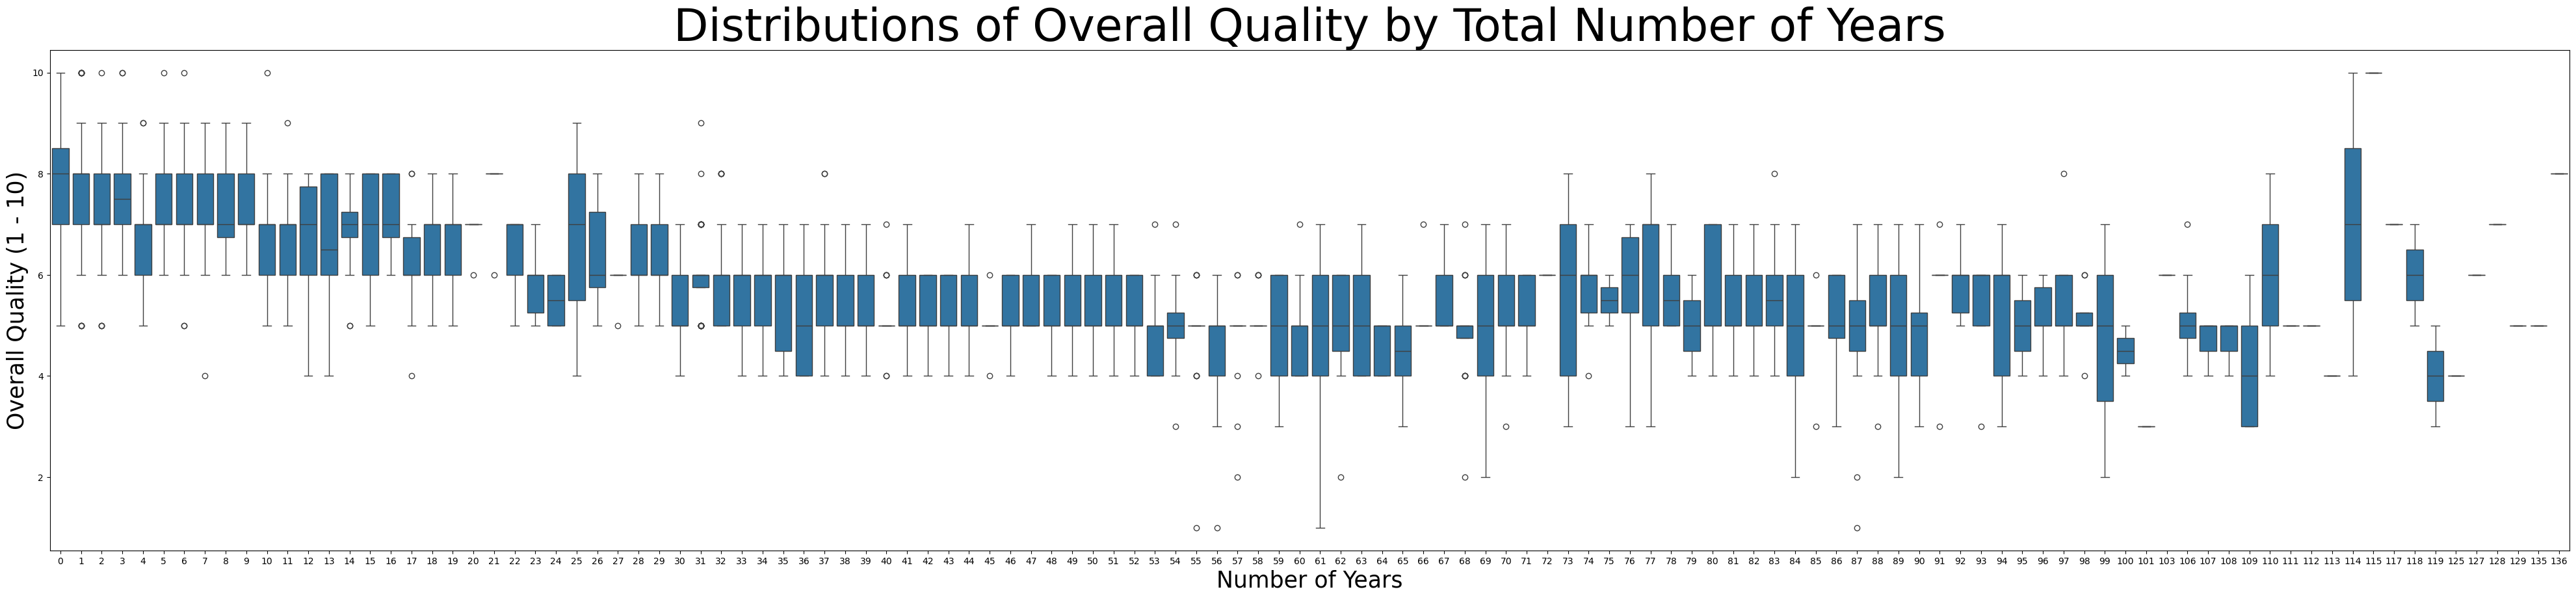

In [37]:
# Overall Qual vs Overall Cond
# Grouped by year built to see if condition or quality has increased or decreased over time.

df_train["Total Years"] = df_train["Yr Sold"] - df_train["Year Built"]

df_test["Total Years"] = df_test["Yr Sold"] - df_test["Year Built"]

plt.figure(figsize = (50, 10))

sns.boxplot(data = df_train,
           x = "Total Years",
           y = "Overall Qual")
plt.title("Distributions of Overall Quality by Total Number of Years", fontsize = 50)
plt.xlabel("Number of Years", fontsize = 25)
plt.ylabel("Overall Quality (1 - 10)", fontsize = 25)

plt.savefig("images/plot5.png")

The above side-by-side boxplots display the distributions of overall quality (the overall material and finish of the house) by the total number of years the houses had been built since. The average overall quality has increased as time has gone on with a slight exception with houses built 100 plus years ago.

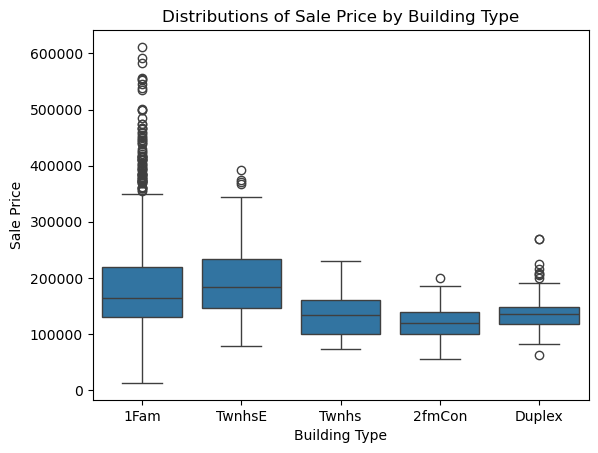

In [39]:
# SalePrice by Bldg Type
# Which building type is the most expensive?

sns.boxplot(data = df_train,
           x = "Bldg Type",
           y = "SalePrice")
plt.title("Distributions of Sale Price by Building Type")
plt.xlabel("Building Type")
plt.ylabel("Sale Price")

plt.savefig("images/plot6.png")

The above side-by-side boxplots display the distributions of sale prices by building type. Townhouses have the highest average following single family homes.

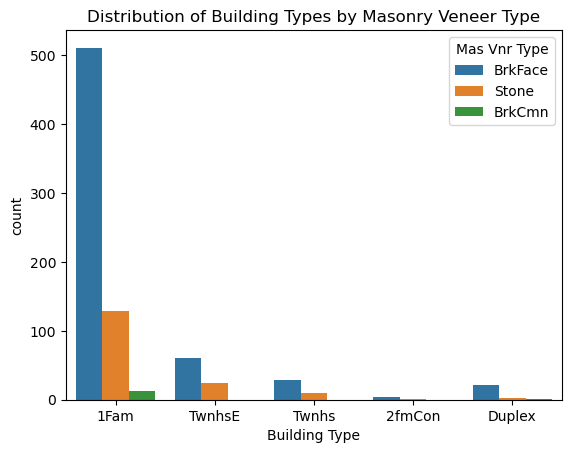

In [41]:
# Bldg Type by Mas Vnr Type
# Which building type uses the best materials?
# What are the best materials between the 3?

sns.countplot(data = df_train,
              x = "Bldg Type",
              hue = "Mas Vnr Type")
plt.title("Distribution of Building Types by Masonry Veneer Type")
plt.xlabel("Building Type")

plt.savefig("images/plot7.png")

The countplot above displays the distributions of building types by masonry veneer type; single family homes show the highest count made up of brick face. Common bricks are always used for an internal and structural purpose, whereas face bricks are used for aesthetics. There is one key similarity between a face brick vs a common brick. Both are manufactured to be fire-resistant, weatherproof and energy-efficient.

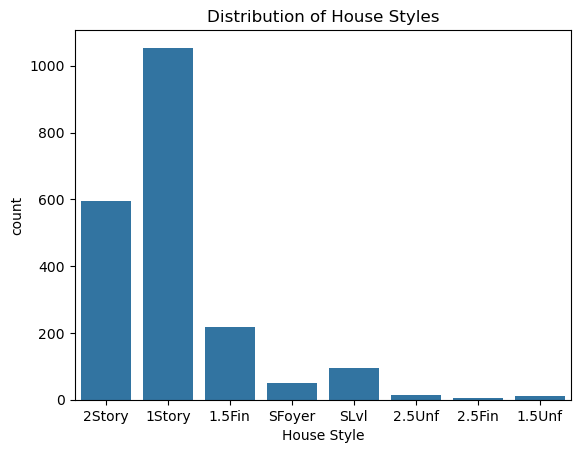

In [43]:
# Bar Graph of House Style
# Which house style is the most popular to build?

sns.countplot(data = df_train,
              x = "House Style")
plt.title("Distribution of House Styles")
plt.xlabel("House Style")

plt.savefig("images/plot8.png")

The countplot shown above displays the distribution of house styles with one story houses being the highest count. One story houses are also extremely common in the Midwest which may also lead to their popularity here in Ames, Iowa.

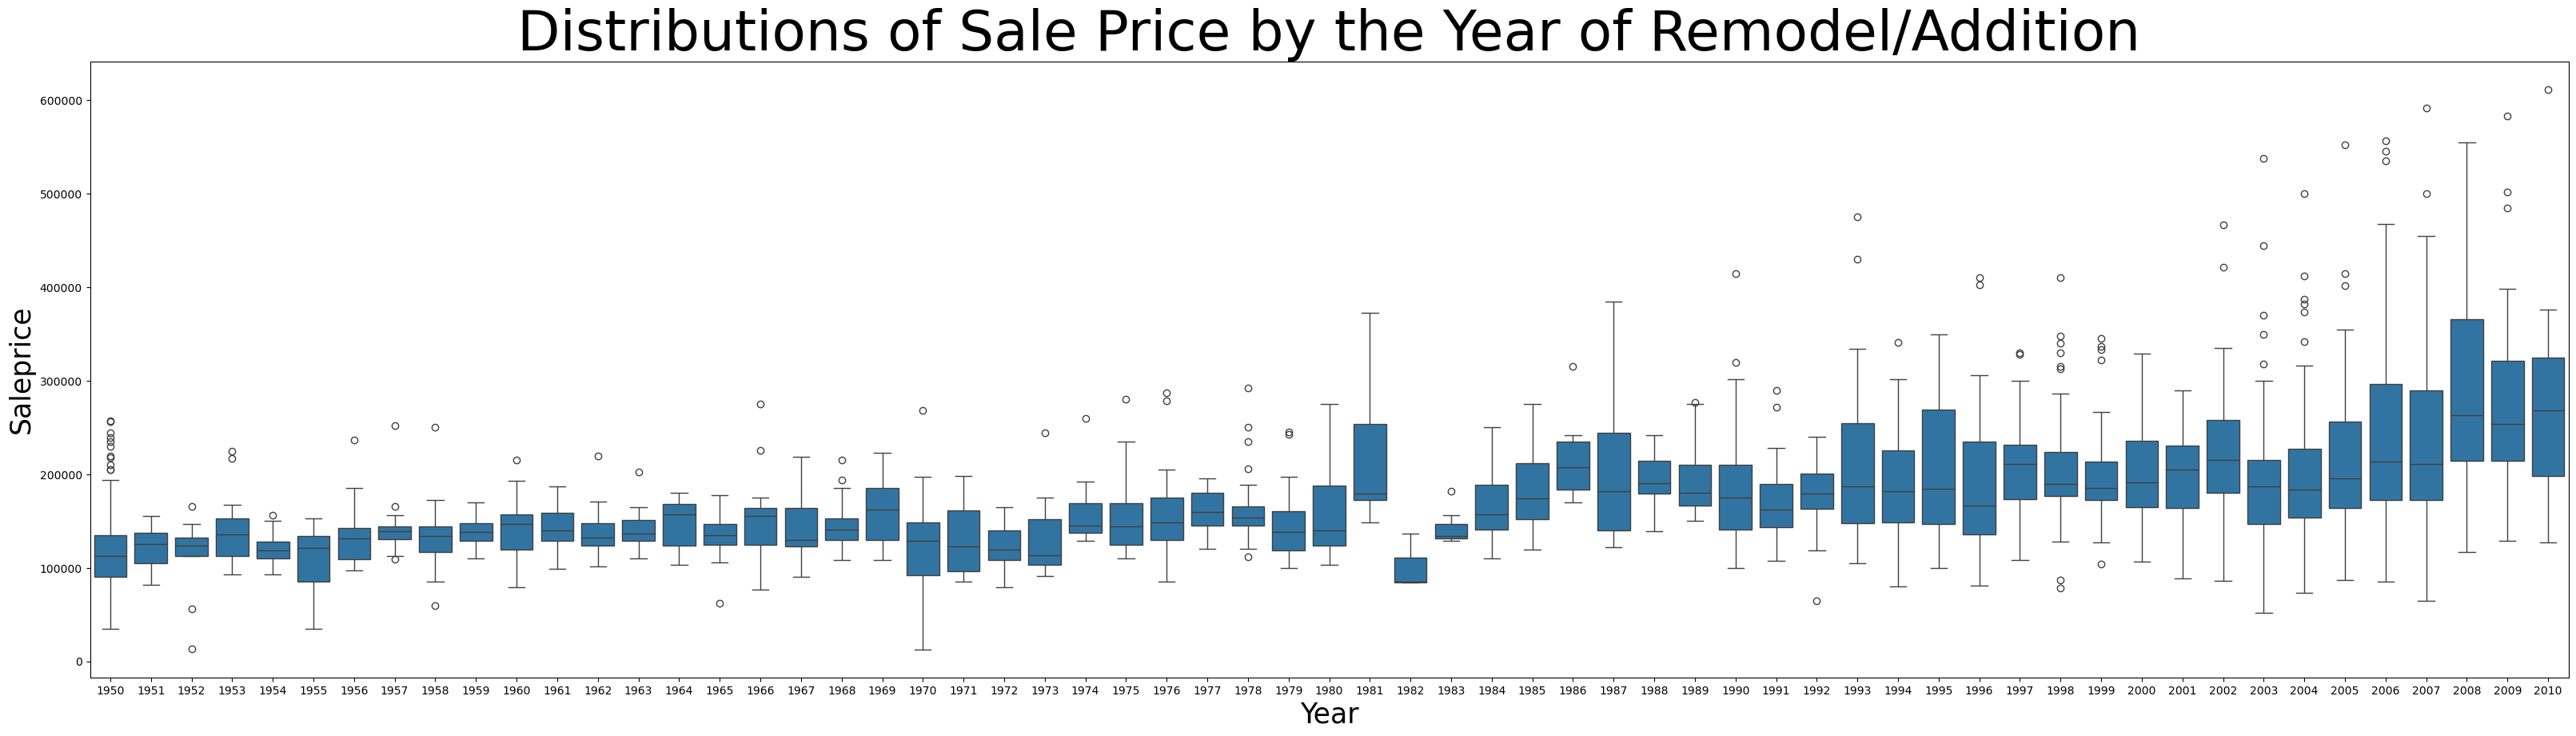

In [45]:
# Year Remod/Add vs SalePrice
# Has having a remodel or addition done affected SalePrice?

plt.figure(figsize = (40, 10))

sns.boxplot(data = df_train,
           x = "Year Remod/Add",
           y = "SalePrice")
plt.title("Distributions of Sale Price by the Year of Remodel/Addition", fontsize = 50)
plt.xlabel("Year", fontsize = 25)
plt.ylabel("Saleprice", fontsize = 25)

plt.savefig("images/plot9.png")

The above side-by-side boxplots display the distributions of sale prices by year of remodel or addition. Average sale prices increase as time goes on if the home has been remodeled or has had an addition.

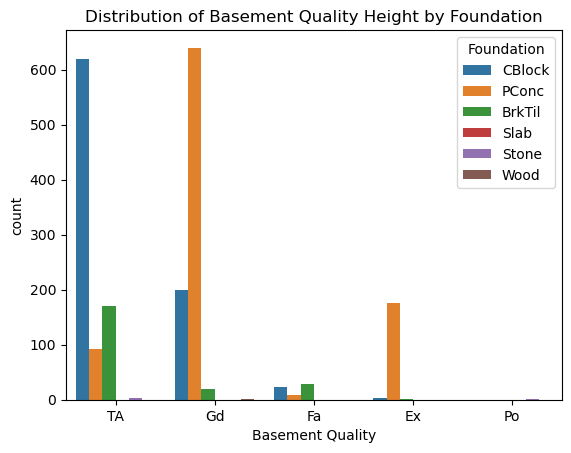

In [47]:
# Foundation vs Bsmt Qual

sns.countplot(data = df_train,
              x = "Bsmt Qual",
              hue = "Foundation")
plt.title("Distribution of Basement Quality Height by Foundation")
plt.xlabel("Basement Quality")

plt.savefig("images/plot10.png")

The above counplot displays the distribution basement quality height by foundation type. Good (90 - 99 inches) basements and typical (80 - 89 inches) basements have the highest count.

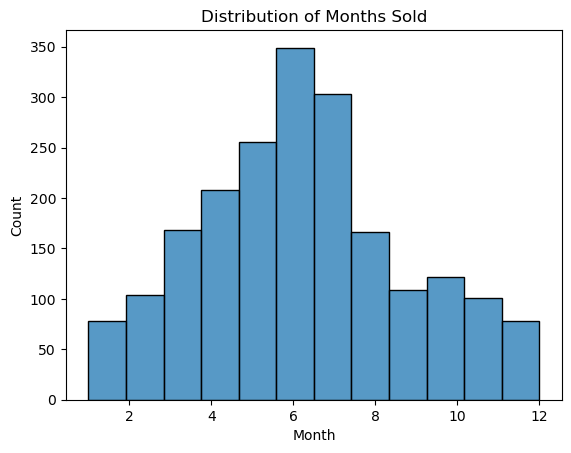

In [49]:
# Histogram of Mo Sold
# Maybe it's more popular to buy houses during certain times of the year than others.

sns.histplot(data = df_train,
             x = "Mo Sold",
             bins = 12)
plt.title("Distribution of Months Sold")
plt.xlabel("Month")

plt.savefig("images/plot11.png")

The above histogram shows the distribution of properties sold throughout the year by month. The data is normally distributed with June having the highest count. Factors contributing to a more active real estate market with greater inventory and potential buyers is something to consider.

In [51]:
df_train.to_csv("cleaned_train_data.csv")
df_test.to_csv("cleaned_test_data.csv")